In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/12_Dec.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,12.500000,77.000000,1,6,1,1847.0,1849.0,1961.0,1673.0,1619.0,1562.0,1841.333333,1720.0
1,12.375000,76.916667,1,6,1,1807.0,1867.0,1931.0,1642.0,1573.0,1520.0,1821.333333,1691.0
2,12.250000,76.833333,1,6,1,1778.0,1876.0,1908.0,1626.0,1559.0,1500.0,1801.666667,1672.0
3,12.125000,76.750000,1,6,1,1754.0,1876.0,1883.0,1621.0,1546.0,1497.0,1782.166667,1649.0
4,12.000000,76.666667,2,6,1,1720.0,1847.0,1849.0,1569.0,1533.0,1487.0,1764.416667,1636.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,5.842452,89.215220,23,3,1,1985.0,2067.0,2151.0,1827.0,1683.0,1801.0,2005.666667,1858.0
8924,5.842452,89.215220,24,3,1,1957.0,2055.0,2107.0,1806.0,1662.0,1781.0,1982.500000,1829.0
8925,5.842452,89.215220,24,3,1,1910.0,2052.0,2090.0,1759.0,1623.0,1748.0,1956.500000,1778.0
8926,5.500000,89.215220,24,3,1,1877.0,2024.0,2086.0,1719.0,1620.0,1735.0,1930.583333,1775.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   int64  
 3   B       8928 non-null   int64  
 4   C       8928 non-null   int64  
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 906.9 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   float64
 3   B       8928 non-null   float64
 4   C       8928 non-null   float64
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(13)
memory usage: 906.9 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 7392][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.256860,-0.440305,0.493228,-1.660902,0.980772,0.73477,0.221569,0.228605,0.651275,-0.462822,-0.674330,-0.896594,0.209780
1,-0.366255,-0.469823,0.488546,-1.660902,0.980772,0.73477,0.070577,0.296582,0.537933,-0.579891,-0.847613,-1.055759,0.130591
2,-0.437928,-0.499342,0.483863,-1.660902,0.980772,0.73477,-0.038892,0.330571,0.451038,-0.640314,-0.900352,-1.131552,0.052722
3,-0.524689,-0.528861,0.479181,-1.660902,0.980772,0.73477,-0.129487,0.330571,0.356586,-0.659196,-0.949323,-1.142921,-0.024487
4,-0.573728,-0.558380,0.474499,-1.516457,0.980772,0.73477,-0.257830,0.221051,0.228132,-0.855570,-0.998295,-1.180817,-0.094767


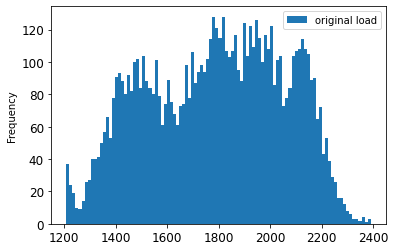

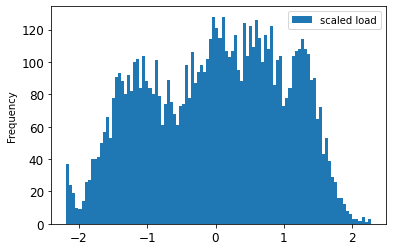

In [9]:
stlf_data[stlf_data.index <= 7392][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7392][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

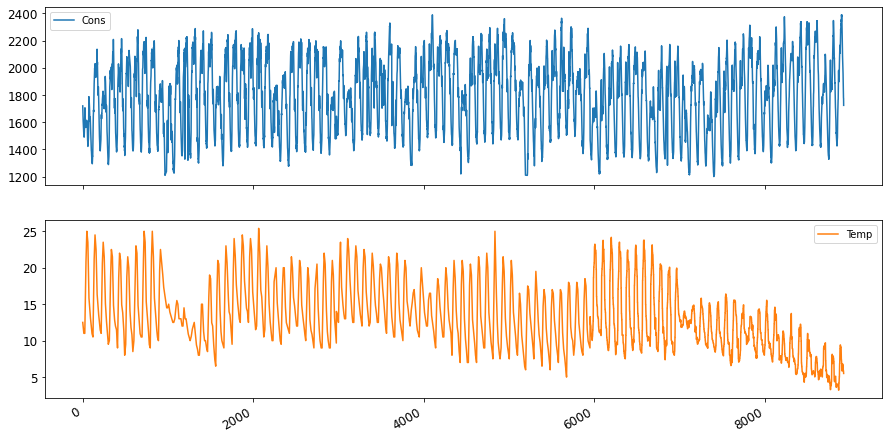

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-0.256860,-0.440305,0.493228,-1.660902,0.980772,0.73477,0.221569,0.228605,0.651275,-0.462822,-0.674330,-0.896594,0.209780,-1.452658
1,-0.366255,-0.469823,0.488546,-1.660902,0.980772,0.73477,0.070577,0.296582,0.537933,-0.579891,-0.847613,-1.055759,0.130591,-1.505469
2,-0.437928,-0.499342,0.483863,-1.660902,0.980772,0.73477,-0.038892,0.330571,0.451038,-0.640314,-0.900352,-1.131552,0.052722,-1.513013
3,-0.524689,-0.528861,0.479181,-1.660902,0.980772,0.73477,-0.129487,0.330571,0.356586,-0.659196,-0.949323,-1.142921,-0.024487,-1.573369
4,-0.573728,-0.558380,0.474499,-1.516457,0.980772,0.73477,-0.257830,0.221051,0.228132,-0.855570,-0.998295,-1.180817,-0.094767,-1.675219
5,-0.675578,-0.587899,0.469816,-1.516457,0.980772,0.73477,-0.367299,0.069990,0.296137,-0.983969,-1.096238,-1.290717,-0.179895,-1.739347
6,-0.724617,-0.617418,0.465134,-1.516457,0.980772,0.73477,-0.439020,-0.039529,0.330140,-0.897111,-1.133908,-1.427144,-0.272281,-1.780842
7,-0.754795,-0.646936,0.460452,-1.516457,0.980772,0.73477,-0.525840,-0.130166,0.330140,-0.874452,-1.228084,-1.374089,-0.367308,-1.761981
8,-0.818923,-0.676455,0.455769,-1.372011,0.980772,0.73477,-0.574912,-0.258567,0.220576,-0.980192,-1.246919,-1.430933,-0.458375,-1.818564
9,-0.890595,-0.705974,0.451087,-1.372011,0.980772,0.73477,-0.676832,-0.368087,0.069453,-1.002851,-1.265754,-1.453671,-0.542512,-1.818564


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-0.256860,-0.440305,0.493228,-1.660902,0.980772,0.73477,0.221569,0.228605,0.651275,-0.462822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.256860
1,-0.366255,-0.469823,0.488546,-1.660902,0.980772,0.73477,0.070577,0.296582,0.537933,-0.579891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.256860,-0.366255
2,-0.437928,-0.499342,0.483863,-1.660902,0.980772,0.73477,-0.038892,0.330571,0.451038,-0.640314,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.256860,-0.366255,-0.437928
3,-0.524689,-0.528861,0.479181,-1.660902,0.980772,0.73477,-0.129487,0.330571,0.356586,-0.659196,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.256860,-0.366255,-0.437928,-0.524689
4,-0.573728,-0.558380,0.474499,-1.516457,0.980772,0.73477,-0.257830,0.221051,0.228132,-0.855570,...,NaN,NaN,NaN,NaN,NaN,-0.256860,-0.366255,-0.437928,-0.524689,-0.573728
5,-0.675578,-0.587899,0.469816,-1.516457,0.980772,0.73477,-0.367299,0.069990,0.296137,-0.983969,...,NaN,NaN,NaN,NaN,-0.256860,-0.366255,-0.437928,-0.524689,-0.573728,-0.675578
6,-0.724617,-0.617418,0.465134,-1.516457,0.980772,0.73477,-0.439020,-0.039529,0.330140,-0.897111,...,NaN,NaN,NaN,-0.256860,-0.366255,-0.437928,-0.524689,-0.573728,-0.675578,-0.724617
7,-0.754795,-0.646936,0.460452,-1.516457,0.980772,0.73477,-0.525840,-0.130166,0.330140,-0.874452,...,NaN,NaN,-0.256860,-0.366255,-0.437928,-0.524689,-0.573728,-0.675578,-0.724617,-0.754795
8,-0.818923,-0.676455,0.455769,-1.372011,0.980772,0.73477,-0.574912,-0.258567,0.220576,-0.980192,...,NaN,-0.256860,-0.366255,-0.437928,-0.524689,-0.573728,-0.675578,-0.724617,-0.754795,-0.818923
9,-0.890595,-0.705974,0.451087,-1.372011,0.980772,0.73477,-0.676832,-0.368087,0.069453,-1.002851,...,-0.25686,-0.366255,-0.437928,-0.524689,-0.573728,-0.675578,-0.724617,-0.754795,-0.818923,-0.890595


In [13]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7383,-0.758567,-0.973426,1.346737,1.372460,-1.423993,-1.360969,-0.642858,-0.307662,0.073231,-0.292883,...,-0.237999,-0.305899,-0.434155,-0.509600,-0.547322,-0.641628,-0.713300,-0.637856,-0.637856,-0.758567
7384,-0.917001,-0.973426,1.346737,1.516906,-1.423993,-1.360969,-0.714579,-0.436064,-0.047667,-0.417505,...,-0.305899,-0.434155,-0.509600,-0.547322,-0.641628,-0.713300,-0.637856,-0.637856,-0.758567,-0.917001
7385,-1.003762,-0.973426,1.346737,1.516906,-1.423993,-1.360969,-0.639084,-0.511595,-0.130784,-0.542127,...,-0.434155,-0.509600,-0.547322,-0.641628,-0.713300,-0.637856,-0.637856,-0.758567,-0.917001,-1.003762
7386,-1.105612,-0.992318,1.353450,1.516906,-1.423993,-1.360969,-0.639084,-0.549360,-0.240348,-0.602550,...,-0.509600,-0.547322,-0.641628,-0.713300,-0.637856,-0.637856,-0.758567,-0.917001,-1.003762,-1.105612
7387,-1.162196,-1.011210,1.360163,1.516906,-1.423993,-1.360969,-0.759877,-0.643773,-0.308353,-0.700737,...,-0.547322,-0.641628,-0.713300,-0.637856,-0.637856,-0.758567,-0.917001,-1.003762,-1.105612,-1.162196
7388,-1.264046,-1.011210,1.360163,1.661352,-1.423993,-1.360969,-0.918418,-0.715527,-0.436808,-0.802700,...,-0.641628,-0.713300,-0.637856,-0.637856,-0.758567,-0.917001,-1.003762,-1.105612,-1.162196,-1.264046
7389,-1.354580,-1.011210,1.360163,1.661352,-1.423993,-1.360969,-1.005238,-0.639997,-0.512369,-0.878229,...,-0.713300,-0.637856,-0.637856,-0.758567,-0.917001,-1.003762,-1.105612,-1.162196,-1.264046,-1.354580
7390,-1.430024,-1.027741,1.360163,1.661352,-1.423993,-1.360969,-1.107158,-0.639997,-0.550150,-0.934875,...,-0.637856,-0.637856,-0.758567,-0.917001,-1.003762,-1.105612,-1.162196,-1.264046,-1.354580,-1.430024
7391,-1.577141,-1.027741,1.381012,1.661352,-1.423993,-1.360969,-1.163780,-0.760846,-0.644601,-1.067050,...,-0.637856,-0.758567,-0.917001,-1.003762,-1.105612,-1.162196,-1.264046,-1.354580,-1.430024,-1.577141
7392,-1.603547,-1.027741,1.381012,-1.660902,-0.943040,0.734770,-1.265699,-0.919460,-0.716385,-1.123697,...,-0.758567,-0.917001,-1.003762,-1.105612,-1.162196,-1.264046,-1.354580,-1.430024,-1.577141,-1.603547


In [14]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.dropna(how='any')

In [15]:
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7283,-0.173871,-0.489317,1.433847,1.228014,1.461725,-1.360969,0.312164,0.768648,0.923296,-0.190919,...,0.848403,0.769186,0.678653,0.531536,0.422141,0.312746,0.146768,0.022285,-0.026754,-0.173871
7284,-0.173871,-0.489317,1.433847,1.372460,1.461725,-1.360969,0.146073,0.678011,0.896850,-0.240013,...,0.769186,0.678653,0.531536,0.422141,0.312746,0.146768,0.022285,-0.026754,-0.173871,-0.173871
7285,-0.234227,-0.489317,1.433847,1.372460,1.461725,-1.360969,0.021505,0.530727,0.847735,-0.281553,...,0.678653,0.531536,0.422141,0.312746,0.146768,0.022285,-0.026754,-0.173871,-0.173871,-0.234227
7286,-0.139921,-0.569608,1.489514,1.372460,1.461725,-1.360969,-0.027568,0.421207,0.847735,-0.190919,...,0.531536,0.422141,0.312746,0.146768,0.022285,-0.026754,-0.173871,-0.173871,-0.234227,-0.139921
7287,-0.264405,-0.649900,1.545181,1.372460,1.461725,-1.360969,-0.174784,0.311688,0.768396,-0.270224,...,0.422141,0.312746,0.146768,0.022285,-0.026754,-0.173871,-0.173871,-0.234227,-0.139921,-0.264405
7288,-0.388889,-0.649900,1.545181,1.516906,1.461725,-1.360969,-0.174784,0.145521,0.677722,-0.353305,...,0.312746,0.146768,0.022285,-0.026754,-0.173871,-0.173871,-0.234227,-0.139921,-0.264405,-0.388889
7289,-0.513372,-0.649900,1.545181,1.516906,1.461725,-1.360969,-0.235181,0.020896,0.530377,-0.489257,...,0.146768,0.022285,-0.026754,-0.173871,-0.173871,-0.234227,-0.139921,-0.264405,-0.388889,-0.513372
7290,-0.573728,-0.693587,1.557361,1.516906,1.461725,-1.360969,-0.140811,-0.028199,0.420813,-0.602550,...,0.022285,-0.026754,-0.173871,-0.173871,-0.234227,-0.139921,-0.264405,-0.388889,-0.513372,-0.573728
7291,-0.671806,-0.737275,1.569542,1.516906,1.461725,-1.360969,-0.265379,-0.175484,0.311249,-0.685631,...,-0.026754,-0.173871,-0.173871,-0.234227,-0.139921,-0.264405,-0.388889,-0.513372,-0.573728,-0.671806
7292,-0.773656,-0.737275,1.569542,1.661352,1.461725,-1.360969,-0.389947,-0.175484,0.145015,-0.836688,...,-0.173871,-0.173871,-0.234227,-0.139921,-0.264405,-0.388889,-0.513372,-0.573728,-0.671806,-0.773656


In [16]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
10,-1.811020
11,-1.822336
12,-1.863831
13,-1.807247
14,-1.773297
...,...
7288,-1.264046
7289,-1.354580
7290,-1.430024
7291,-1.577141


In [17]:
X_train = train_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
10,-0.920773,-0.735493,0.446405,-1.372011,0.980772,0.734770,-0.725904,-0.439841,-0.040111,-0.995298,-1.258220,-1.518095,-0.619721
11,-0.913229,-0.765012,0.441723,-1.372011,0.980772,0.734770,-0.756102,-0.526701,-0.130784,-0.987745,-1.265754,-1.495357,-0.688352
12,-0.984901,-0.794531,0.437040,-1.227565,0.980772,0.734770,-0.820274,-0.575796,-0.259239,-1.025510,-1.326027,-1.555991,-0.752032
13,-1.075435,-0.794531,0.437040,-1.227565,0.980772,0.734770,-0.891995,-0.677762,-0.368803,-1.116144,-1.314726,-1.578729,-0.814063
14,-1.067890,-0.794531,0.437040,-1.227565,0.980772,0.734770,-0.922193,-0.726857,-0.440586,-1.127473,-1.367464,-1.502937,-0.869166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7288,-0.388889,-0.649900,1.545181,1.516906,1.461725,-1.360969,-0.174784,0.145521,0.677722,-0.353305,-1.133908,-0.305410,0.001909
7289,-0.513372,-0.649900,1.545181,1.516906,1.461725,-1.360969,-0.235181,0.020896,0.530377,-0.489257,-1.243152,-0.438048,-0.089487
7290,-0.573728,-0.693587,1.557361,1.516906,1.461725,-1.360969,-0.140811,-0.028199,0.420813,-0.602550,-1.273288,-0.517630,-0.176595
7291,-0.671806,-0.737275,1.569542,1.516906,1.461725,-1.360969,-0.265379,-0.175484,0.311249,-0.685631,-1.401368,-0.665426,-0.262713


In [18]:
X_train=np.atleast_3d(X_train)
X_train.shape

(7283, 13, 1)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,1338.0,10.012452,92.800354,1.0,2.0,1.0,1429.0,1522.0,1619.0,1464.0,1471.0,1322.0,1467.500000
7394,1321.0,9.842452,92.821242,1.0,2.0,1.0,1409.0,1495.0,1619.0,1455.0,1465.0,1292.0,1442.666667
7395,1302.0,9.672452,92.842130,1.0,2.0,1.0,1370.0,1480.0,1587.0,1429.0,1444.0,1291.0,1418.916667
7396,1288.0,9.672452,92.842130,2.0,2.0,1.0,1363.0,1453.0,1545.0,1421.0,1423.0,1269.0,1397.500000
7397,1263.0,9.672452,92.842130,2.0,2.0,1.0,1338.0,1429.0,1522.0,1388.0,1401.0,1260.0,1375.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8349,1684.0,7.492452,95.488050,24.0,4.0,0.0,1789.0,1912.0,1995.0,1767.0,1718.0,1590.0,1839.916667
8350,1656.0,7.282452,95.488050,24.0,4.0,0.0,1772.0,1899.0,1977.0,1736.0,1695.0,1566.0,1813.166667
8351,1647.0,7.282452,95.544320,24.0,4.0,0.0,1740.0,1869.0,1953.0,1714.0,1682.5,1539.0,1787.666667
8352,1627.0,7.282452,95.544320,1.0,5.0,1.0,1710.0,1839.0,1935.0,1681.0,1670.0,1504.0,1762.000000


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,-1.677799,-0.188444,0.502619,-1.658081,-0.951768,0.654167,-1.342297,-1.003165,-0.652104,-1.101232,-1.039066,-1.548094,-1.255226
7394,-1.738907,-0.257361,0.504239,-1.658081,-0.951768,0.654167,-1.413925,-1.099623,-0.652104,-1.133198,-1.060847,-1.657706,-1.348021
7395,-1.807204,-0.326277,0.505858,-1.658081,-0.951768,0.654167,-1.553601,-1.153211,-0.766300,-1.225544,-1.137078,-1.661360,-1.436768
7396,-1.857528,-0.326277,0.505858,-1.513750,-0.951768,0.654167,-1.578671,-1.249669,-0.916183,-1.253958,-1.213310,-1.741742,-1.516797
7397,-1.947392,-0.326277,0.505858,-1.513750,-0.951768,0.654167,-1.668206,-1.335410,-0.998262,-1.371167,-1.293172,-1.774625,-1.597448
7398,-2.055229,-0.336412,0.513064,-1.513750,-0.951768,0.654167,-1.729090,-1.406860,-1.094615,-1.431547,-1.416594,-1.825778,-1.679033
7399,-2.022878,-0.346547,0.520269,-1.513750,-0.951768,0.654167,-1.797137,-1.546189,-1.148144,-1.438650,-1.463785,-1.836739,-1.753144
7400,-2.062418,-0.346547,0.520269,-1.369419,-0.951768,0.654167,-1.847277,-1.571197,-1.244497,-1.509686,-1.442005,-1.880584,-1.822274
7401,-2.073202,-0.346547,0.520269,-1.369419,-0.951768,0.654167,-1.936813,-1.660510,-1.330145,-1.541652,-1.514607,-1.869623,-1.884864
7402,-2.101958,-0.443841,0.702155,-1.369419,-0.951768,0.654167,-2.044256,-1.721243,-1.401517,-1.602032,-1.565428,-1.858661,-1.943717


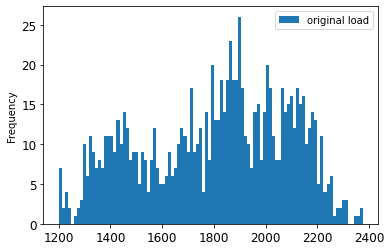

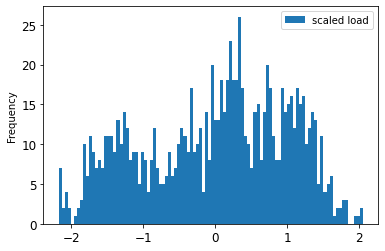

In [21]:
stlf_data[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7393) & (valid.index <=8353)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7393,-1.677799,-0.188444,0.502619,-1.658081,-0.951768,0.654167,-1.342297,-1.003165,-0.652104,-1.101232,-1.039066,-1.548094,-1.255226,-1.505260
7394,-1.738907,-0.257361,0.504239,-1.658081,-0.951768,0.654167,-1.413925,-1.099623,-0.652104,-1.133198,-1.060847,-1.657706,-1.348021,-1.595124
7395,-1.807204,-0.326277,0.505858,-1.658081,-0.951768,0.654167,-1.553601,-1.153211,-0.766300,-1.225544,-1.137078,-1.661360,-1.436768,-1.645448
7396,-1.857528,-0.326277,0.505858,-1.513750,-0.951768,0.654167,-1.578671,-1.249669,-0.916183,-1.253958,-1.213310,-1.741742,-1.516797,-1.688583
7397,-1.947392,-0.326277,0.505858,-1.513750,-0.951768,0.654167,-1.668206,-1.335410,-0.998262,-1.371167,-1.293172,-1.774625,-1.597448,-1.659827
7398,-2.055229,-0.336412,0.513064,-1.513750,-0.951768,0.654167,-1.729090,-1.406860,-1.094615,-1.431547,-1.416594,-1.825778,-1.679033,-1.688583
7399,-2.022878,-0.346547,0.520269,-1.513750,-0.951768,0.654167,-1.797137,-1.546189,-1.148144,-1.438650,-1.463785,-1.836739,-1.753144,-1.706556
7400,-2.062418,-0.346547,0.520269,-1.369419,-0.951768,0.654167,-1.847277,-1.571197,-1.244497,-1.509686,-1.442005,-1.880584,-1.822274,-1.756880
7401,-2.073202,-0.346547,0.520269,-1.369419,-0.951768,0.654167,-1.936813,-1.660510,-1.330145,-1.541652,-1.514607,-1.869623,-1.884864,-1.807204
7402,-2.101958,-0.443841,0.702155,-1.369419,-0.951768,0.654167,-2.044256,-1.721243,-1.401517,-1.602032,-1.565428,-1.858661,-1.943717,-1.846744


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7393,-1.677799,-0.188444,0.502619,-1.658081,-0.951768,0.654167,-1.342297,-1.003165,-0.652104,-1.101232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.677799
7394,-1.738907,-0.257361,0.504239,-1.658081,-0.951768,0.654167,-1.413925,-1.099623,-0.652104,-1.133198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.677799,-1.738907
7395,-1.807204,-0.326277,0.505858,-1.658081,-0.951768,0.654167,-1.553601,-1.153211,-0.766300,-1.225544,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.677799,-1.738907,-1.807204
7396,-1.857528,-0.326277,0.505858,-1.513750,-0.951768,0.654167,-1.578671,-1.249669,-0.916183,-1.253958,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.677799,-1.738907,-1.807204,-1.857528
7397,-1.947392,-0.326277,0.505858,-1.513750,-0.951768,0.654167,-1.668206,-1.335410,-0.998262,-1.371167,...,NaN,NaN,NaN,NaN,NaN,-1.677799,-1.738907,-1.807204,-1.857528,-1.947392
7398,-2.055229,-0.336412,0.513064,-1.513750,-0.951768,0.654167,-1.729090,-1.406860,-1.094615,-1.431547,...,NaN,NaN,NaN,NaN,-1.677799,-1.738907,-1.807204,-1.857528,-1.947392,-2.055229
7399,-2.022878,-0.346547,0.520269,-1.513750,-0.951768,0.654167,-1.797137,-1.546189,-1.148144,-1.438650,...,NaN,NaN,NaN,-1.677799,-1.738907,-1.807204,-1.857528,-1.947392,-2.055229,-2.022878
7400,-2.062418,-0.346547,0.520269,-1.369419,-0.951768,0.654167,-1.847277,-1.571197,-1.244497,-1.509686,...,NaN,NaN,-1.677799,-1.738907,-1.807204,-1.857528,-1.947392,-2.055229,-2.022878,-2.062418
7401,-2.073202,-0.346547,0.520269,-1.369419,-0.951768,0.654167,-1.936813,-1.660510,-1.330145,-1.541652,...,NaN,-1.677799,-1.738907,-1.807204,-1.857528,-1.947392,-2.055229,-2.022878,-2.062418,-2.073202
7402,-2.101958,-0.443841,0.702155,-1.369419,-0.951768,0.654167,-2.044256,-1.721243,-1.401517,-1.602032,...,-1.677799,-1.738907,-1.807204,-1.857528,-1.947392,-2.055229,-2.022878,-2.062418,-2.073202,-2.101958


In [24]:
valid_shifted = valid_shifted.dropna(how='any')

In [25]:
valid_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8244,0.892314,-1.088414,0.349512,1.372873,-0.393374,0.654167,1.293629,1.726247,2.049353,0.692412,...,1.823306,1.729848,1.578876,1.481823,1.409931,1.294905,1.165501,1.043286,0.942638,0.892314
8245,0.766504,-1.088414,0.349512,1.372873,-0.393374,0.654167,1.164698,1.576200,1.981549,0.656895,...,1.729848,1.578876,1.481823,1.409931,1.294905,1.165501,1.043286,0.942638,0.892314,0.766504
8246,0.723370,-1.189762,0.464181,1.372873,-0.393374,0.654167,1.042930,1.479742,1.838803,0.568100,...,1.578876,1.481823,1.409931,1.294905,1.165501,1.043286,0.942638,0.892314,0.766504,0.723370
8247,0.608344,-1.291110,0.578851,1.372873,-0.393374,0.654167,0.942650,1.408292,1.820960,0.440237,...,1.481823,1.409931,1.294905,1.165501,1.043286,0.942638,0.892314,0.766504,0.723370,0.608344
8248,0.450183,-1.291110,0.578851,1.517204,-0.393374,0.654167,0.892510,1.293971,1.728176,0.294614,...,1.409931,1.294905,1.165501,1.043286,0.942638,0.892314,0.766504,0.723370,0.608344,0.450183
8249,0.317184,-1.291110,0.578851,1.517204,-0.393374,0.654167,0.767160,1.165360,1.578293,0.262648,...,1.294905,1.165501,1.043286,0.942638,0.892314,0.766504,0.723370,0.608344,0.450183,0.317184
8250,0.216536,-1.287056,0.599010,1.517204,-0.393374,0.654167,0.724183,1.043894,1.481940,0.170302,...,1.165501,1.043286,0.942638,0.892314,0.766504,0.723370,0.608344,0.450183,0.317184,0.216536
8251,0.112294,-1.283002,0.619169,1.517204,-0.393374,0.654167,0.609578,0.943863,1.410567,0.053094,...,1.043286,0.942638,0.892314,0.766504,0.723370,0.608344,0.450183,0.317184,0.216536,0.112294
8252,-0.042273,-1.283002,0.619169,1.661535,-0.393374,0.654167,0.451995,0.893848,1.296371,-0.099633,...,0.942638,0.892314,0.766504,0.723370,0.608344,0.450183,0.317184,0.216536,0.112294,-0.042273
8253,-0.135731,-1.283002,0.619169,1.661535,-0.393374,0.654167,0.319483,0.768809,1.167900,-0.199082,...,0.892314,0.766504,0.723370,0.608344,0.450183,0.317184,0.216536,0.112294,-0.042273,-0.135731


In [26]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7403,-1.864717
7404,-1.832366
7405,-1.800015
7406,-1.893473
7407,-1.817987
...,...
8249,-0.434080
8250,-0.534728
8251,-0.567079
8252,-0.638970


In [27]:
X_valid = valid_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7403,-2.148687,-0.541135,0.884041,-1.369419,-0.951768,0.654167,-2.012023,-1.789121,-1.540694,-1.683722,-1.608989,-1.913467,-1.994475
7404,-2.173849,-0.541135,0.884041,-1.225087,-0.951768,0.654167,-2.051418,-1.839136,-1.565675,-1.697929,-1.638029,-1.939044,-2.045232
7405,-2.166660,-0.541135,0.884041,-1.225087,-0.951768,0.654167,-2.062163,-1.928449,-1.654890,-1.751206,-1.605359,-1.928082,-2.087581
7406,-2.159471,-0.545189,0.907146,-1.225087,-0.951768,0.654167,-2.090814,-2.035625,-1.715557,-1.765413,-1.670700,-1.946351,-2.124015
7407,-2.152282,-0.549243,0.930251,-1.225087,-0.951768,0.654167,-2.137372,-2.003473,-1.783361,-1.747654,-1.714261,-1.924429,-2.153908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,0.317184,-1.291110,0.578851,1.517204,-0.393374,0.654167,0.767160,1.165360,1.578293,0.262648,-0.269489,0.191086,0.966258
8250,0.216536,-1.287056,0.599010,1.517204,-0.393374,0.654167,0.724183,1.043894,1.481940,0.170302,-0.309420,0.077820,0.856647
8251,0.112294,-1.283002,0.619169,1.517204,-0.393374,0.654167,0.609578,0.943863,1.410567,0.053094,-0.360241,-0.068330,0.744234
8252,-0.042273,-1.283002,0.619169,1.661535,-0.393374,0.654167,0.451995,0.893848,1.296371,-0.099633,-0.552635,-0.134097,0.628396


In [28]:
X_valid=np.atleast_3d(X_valid)

print(X_valid.shape)

(851, 13, 1)


In [29]:
#from keras.layers import RepeatVector
batch_size = 300

model = models.Sequential()

model.add(LSTM(64, input_shape=(1,1)))
model.add(Dropout(0.2))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.0001)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:
import time
start=time.time()

history = model.fit(X_train,
          y_train,
          batch_size=500,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )

stop=time.time()
print(f"Training time: {stop - start}s")

Epoch 1/300
15/15 [==============================] - 2s 102ms/step - loss: 1.0216 - val_loss: 0.9279
Epoch 2/300
15/15 [==============================] - 1s 52ms/step - loss: 0.9601 - val_loss: 0.8646
Epoch 3/300
15/15 [==============================] - 1s 45ms/step - loss: 0.9041 - val_loss: 0.8056
Epoch 4/300
15/15 [==============================] - 1s 43ms/step - loss: 0.8511 - val_loss: 0.7508
Epoch 5/300
15/15 [==============================] - 1s 44ms/step - loss: 0.8028 - val_loss: 0.6987
Epoch 6/300
15/15 [==============================] - 1s 46ms/step - loss: 0.7550 - val_loss: 0.6493
Epoch 7/300
15/15 [==============================] - 1s 45ms/step - loss: 0.7106 - val_loss: 0.6026
Epoch 8/300
15/15 [==============================] - 1s 45ms/step - loss: 0.6694 - val_loss: 0.5603
Epoch 9/300
15/15 [==============================] - 1s 51ms/step - loss: 0.6329 - val_loss: 0.5244
Epoch 10/300
15/15 [==============================] - 1s 50ms/step - loss: 0.6042 - val_loss: 0.495

15/15 [==============================] - 1s 37ms/step - loss: 0.3105 - val_loss: 0.1965
Epoch 156/300
15/15 [==============================] - 1s 36ms/step - loss: 0.3124 - val_loss: 0.1917
Epoch 157/300
15/15 [==============================] - 1s 37ms/step - loss: 0.3129 - val_loss: 0.1923
Epoch 158/300
15/15 [==============================] - 1s 36ms/step - loss: 0.3091 - val_loss: 0.1943
Epoch 159/300
15/15 [==============================] - 1s 37ms/step - loss: 0.3064 - val_loss: 0.1911
Epoch 160/300
15/15 [==============================] - 1s 37ms/step - loss: 0.3080 - val_loss: 0.1917
Epoch 161/300
15/15 [==============================] - 1s 37ms/step - loss: 0.3056 - val_loss: 0.1879
Epoch 162/300
15/15 [==============================] - 1s 36ms/step - loss: 0.3045 - val_loss: 0.1962
Epoch 163/300
15/15 [==============================] - 1s 37ms/step - loss: 0.3048 - val_loss: 0.1844
Epoch 164/300
15/15 [==============================] - 1s 36ms/step - loss: 0.3027 - val_loss: 0

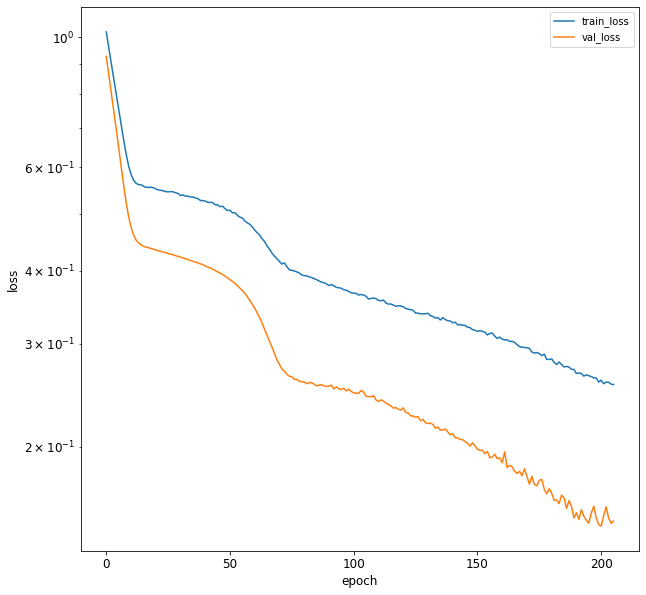

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index<= 8565)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8354,1569.0,7.027451,96.230560,1.0,5.0,1.0,1656.0,1772.0,1899.0,1634.0,1615.0,1474.0,1705.916667
8355,1546.0,6.772451,96.916800,1.0,5.0,1.0,1647.0,1740.0,1869.0,1614.0,1579.0,1453.0,1679.000000
8356,1523.0,6.772451,96.916800,2.0,5.0,1.0,1627.0,1710.0,1839.0,1581.0,1566.0,1435.0,1652.666667
8357,1494.0,6.772451,96.916800,2.0,5.0,1.0,1569.0,1684.0,1789.0,1555.0,1553.0,1406.0,1628.083333
8358,1474.0,6.752451,97.656980,2.0,5.0,1.0,1569.0,1656.0,1772.0,1541.0,1523.0,1394.0,1603.250000
8359,1471.0,6.732451,98.397160,2.0,5.0,1.0,1546.0,1647.0,1740.0,1535.0,1515.0,1372.0,1580.833333
8360,1467.0,6.732451,98.397160,3.0,5.0,1.0,1523.0,1627.0,1710.0,1527.0,1500.0,1366.0,1560.583333
8361,1448.0,6.732451,98.397160,3.0,5.0,1.0,1494.0,1569.0,1684.0,1515.0,1478.0,1341.0,1540.916667
8362,1444.0,6.087451,99.209612,3.0,5.0,1.0,1474.0,1569.0,1656.0,1496.0,1475.0,1355.0,1523.250000
8363,1431.0,5.442451,100.022064,3.0,5.0,1.0,1471.0,1546.0,1647.0,1487.0,1471.0,1322.0,1505.250000


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8354 to 8565
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


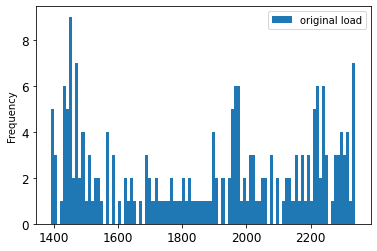

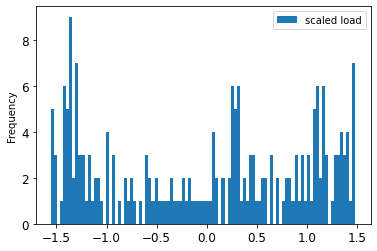

In [36]:
stlf_data[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8354) & (test.index <= 8565)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8354,-0.981931,-0.133559,0.469654,-1.498364,-1.004934,0.340279,-0.722444,-0.371953,0.021852,-0.707077,-0.779254,-1.161860,-0.595280,-1.081008
8355,-1.055440,-0.249231,0.540993,-1.498364,-1.004934,0.340279,-0.751537,-0.477246,-0.078785,-0.779146,-0.907989,-1.232720,-0.686228,-1.164104
8356,-1.128948,-0.249231,0.540993,-1.357685,-1.004934,0.340279,-0.816186,-0.575957,-0.179422,-0.898060,-0.954476,-1.293457,-0.775206,-1.160908
8357,-1.221633,-0.249231,0.540993,-1.357685,-1.004934,0.340279,-1.003670,-0.661507,-0.347150,-0.991750,-1.000964,-1.391311,-0.858270,-1.224829
8358,-1.285553,-0.258303,0.617938,-1.357685,-1.004934,0.340279,-1.003670,-0.753638,-0.404177,-1.042198,-1.108242,-1.431803,-0.942179,-1.256789
8359,-1.295141,-0.267376,0.694884,-1.357685,-1.004934,0.340279,-1.078017,-0.783252,-0.511523,-1.063819,-1.136850,-1.506037,-1.017923,-1.304729
8360,-1.307925,-0.267376,0.694884,-1.217006,-1.004934,0.340279,-1.152364,-0.849059,-0.612160,-1.092647,-1.190489,-1.526282,-1.086345,-1.339885
8361,-1.368649,-0.267376,0.694884,-1.217006,-1.004934,0.340279,-1.246106,-1.039902,-0.699379,-1.135888,-1.269160,-1.610640,-1.152797,-1.368649
8362,-1.381434,-0.559957,0.779343,-1.217006,-1.004934,0.340279,-1.310756,-1.039902,-0.793306,-1.204354,-1.279888,-1.563400,-1.212490,-1.381434
8363,-1.422982,-0.852537,0.863802,-1.217006,-1.004934,0.340279,-1.320453,-1.115581,-0.823497,-1.236785,-1.294192,-1.674751,-1.273310,-1.371846


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8354,-0.981931,-0.133559,0.469654,-1.498364,-1.004934,0.340279,-0.722444,-0.371953,0.021852,-0.707077,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.981931
8355,-1.055440,-0.249231,0.540993,-1.498364,-1.004934,0.340279,-0.751537,-0.477246,-0.078785,-0.779146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.981931,-1.055440
8356,-1.128948,-0.249231,0.540993,-1.357685,-1.004934,0.340279,-0.816186,-0.575957,-0.179422,-0.898060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.981931,-1.055440,-1.128948
8357,-1.221633,-0.249231,0.540993,-1.357685,-1.004934,0.340279,-1.003670,-0.661507,-0.347150,-0.991750,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.981931,-1.055440,-1.128948,-1.221633
8358,-1.285553,-0.258303,0.617938,-1.357685,-1.004934,0.340279,-1.003670,-0.753638,-0.404177,-1.042198,...,NaN,NaN,NaN,NaN,NaN,-0.981931,-1.055440,-1.128948,-1.221633,-1.285553
8359,-1.295141,-0.267376,0.694884,-1.357685,-1.004934,0.340279,-1.078017,-0.783252,-0.511523,-1.063819,...,NaN,NaN,NaN,NaN,-0.981931,-1.055440,-1.128948,-1.221633,-1.285553,-1.295141
8360,-1.307925,-0.267376,0.694884,-1.217006,-1.004934,0.340279,-1.152364,-0.849059,-0.612160,-1.092647,...,NaN,NaN,NaN,-0.981931,-1.055440,-1.128948,-1.221633,-1.285553,-1.295141,-1.307925
8361,-1.368649,-0.267376,0.694884,-1.217006,-1.004934,0.340279,-1.246106,-1.039902,-0.699379,-1.135888,...,NaN,NaN,-0.981931,-1.055440,-1.128948,-1.221633,-1.285553,-1.295141,-1.307925,-1.368649
8362,-1.381434,-0.559957,0.779343,-1.217006,-1.004934,0.340279,-1.310756,-1.039902,-0.793306,-1.204354,...,NaN,-0.981931,-1.055440,-1.128948,-1.221633,-1.285553,-1.295141,-1.307925,-1.368649,-1.381434
8363,-1.422982,-0.852537,0.863802,-1.217006,-1.004934,0.340279,-1.320453,-1.115581,-0.823497,-1.236785,...,-0.981931,-1.055440,-1.128948,-1.221633,-1.285553,-1.295141,-1.307925,-1.368649,-1.381434,-1.422982


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.tail(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8461,-1.368649,-1.251718,0.739542,-1.076327,0.516823,0.340279,-1.249339,-1.053063,-0.813434,-1.586320,...,-0.933991,-0.994715,-1.081008,-1.164104,-1.160908,-1.224829,-1.256789,-1.304729,-1.339885,-1.368649
8462,-1.381434,-1.312956,0.724797,-1.076327,0.516823,0.340279,-1.281663,-1.141904,-0.853688,-1.579113,...,-0.994715,-1.081008,-1.164104,-1.160908,-1.224829,-1.256789,-1.304729,-1.339885,-1.368649,-1.381434
8463,-1.371846,-1.374194,0.710052,-1.076327,0.516823,0.340279,-1.330151,-1.227454,-0.904007,-1.557493,...,-1.081008,-1.164104,-1.160908,-1.224829,-1.256789,-1.304729,-1.339885,-1.368649,-1.381434,-1.371846
8464,-1.384630,-1.374194,0.710052,-0.935648,0.516823,0.340279,-1.365708,-1.224164,-1.034835,-1.575510,...,-1.164104,-1.160908,-1.224829,-1.256789,-1.304729,-1.339885,-1.368649,-1.381434,-1.371846,-1.384630
8465,-1.352669,-1.374194,0.710052,-0.935648,0.516823,0.340279,-1.394800,-1.289971,-1.098572,-1.571907,...,-1.160908,-1.224829,-1.256789,-1.304729,-1.339885,-1.368649,-1.381434,-1.371846,-1.384630,-1.352669


In [40]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8364,-1.384630
8365,-1.352669
8366,-1.352669
8367,-1.343081
8368,-1.269573
...,...
8461,-1.400610
8462,-1.426178
8463,-1.368649
8464,-1.343081


In [41]:
X_test = test_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8364,-1.502882,-0.852537,0.863802,-1.076327,-1.004934,0.340279,-1.333383,-1.191260,-0.890589,-1.499837,-1.337103,-1.708494,-1.335538
8365,-1.554019,-0.852537,0.863802,-1.076327,-1.004934,0.340279,-1.394800,-1.286681,-1.085153,-1.323268,-1.444382,-1.698371,-1.385940
8366,-1.547626,-0.866146,0.863764,-1.076327,-1.004934,0.340279,-1.407730,-1.352489,-1.085153,-1.398941,-1.405046,-1.748985,-1.435779
8367,-1.528450,-0.879754,0.863726,-1.076327,-1.004934,0.340279,-1.449752,-1.362360,-1.162308,-1.362906,-1.462262,-1.738862,-1.477452
8368,-1.544430,-0.879754,0.863726,-0.935648,-1.004934,0.340279,-1.530564,-1.375521,-1.239463,-1.337682,-1.401470,-1.718617,-1.514056
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,-1.368649,-1.251718,0.739542,-1.076327,0.516823,0.340279,-1.249339,-1.053063,-0.813434,-1.586320,-1.322799,-1.313703,-1.200383
8462,-1.381434,-1.312956,0.724797,-1.076327,0.516823,0.340279,-1.281663,-1.141904,-0.853688,-1.579113,-1.397894,-1.276585,-1.255008
8463,-1.371846,-1.374194,0.710052,-1.076327,0.516823,0.340279,-1.330151,-1.227454,-0.904007,-1.557493,-1.362135,-1.330574,-1.304565
8464,-1.384630,-1.374194,0.710052,-0.935648,0.516823,0.340279,-1.365708,-1.224164,-1.034835,-1.575510,-1.337103,-1.273211,-1.344267


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 13, 1)

In [43]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(102,13,1)

In [44]:
import time
start=time.time()

predictions = model.predict(X_test)
stop=time.time()
predictions

print(f"Test time: {stop - start}s")

Test time: 0.9690556526184082s


In [45]:
feature=stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1876.235849
dtype: float64
Cons    313.629919
dtype: float64


In [46]:
load_mean=1876.235849
load_std=313.629919
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(102, 1)


In [47]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(102, 1)


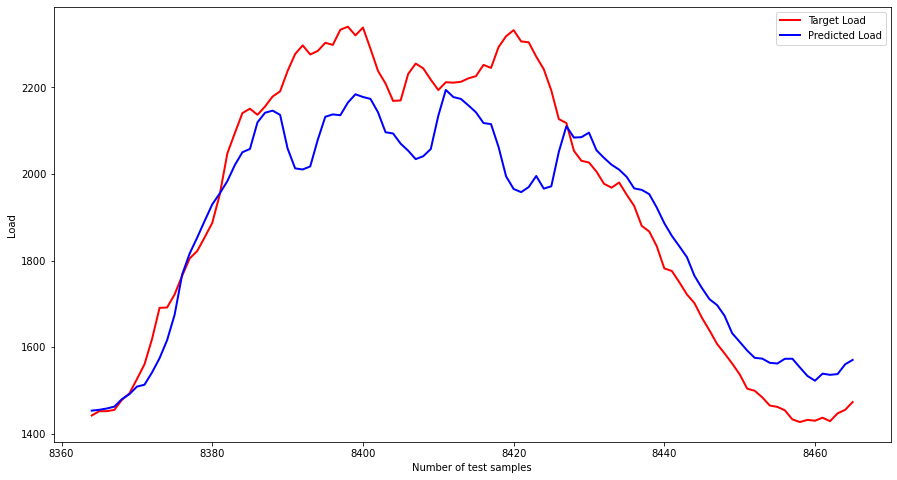

In [48]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [49]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

5.210902584110679


In [50]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100    1.234352
dtype: float64


In [51]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8364  144096.675036
8365  145099.603919
8366  145099.397988
8367  145400.020833
8368  147705.862038
...             ...
8461  143589.194677
8462  142786.892189
8463  144592.375999
8464  145393.304273
8465  147198.185742

[102 rows x 1 columns]


In [52]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

           y_t+100
8364    127.735726
8365     10.369217
8366     38.567071
8367     56.131248
8368      3.016597
...            ...
8461  10352.494140
8462  11454.074573
8463   8221.393925
8464  11070.911146
8465   9481.679104

[102 rows x 1 columns]
y_t+100    17513.082819
dtype: float64


In [53]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    132.337005
dtype: float64


In [54]:
a=np.array(rescaled_predicted_load)

In [55]:
for i in  range(0,102):
    b=a[i]
    print(b)

[1453.2766]
[1455.2184]
[1458.2085]
[1462.4974]
[1479.7966]
[1491.2897]
[1508.769]
[1513.0669]
[1541.4105]
[1574.2427]
[1615.9285]
[1674.7458]
[1767.5802]
[1816.3196]
[1853.1436]
[1891.9623]
[1929.8235]
[1955.1627]
[1983.3712]
[2020.7126]
[2050.1233]
[2057.726]
[2119.1758]
[2141.2793]
[2146.2363]
[2136.4858]
[2058.551]
[2012.8169]
[2010.2822]
[2017.2562]
[2078.7515]
[2131.9563]
[2137.4734]
[2135.6194]
[2164.8313]
[2183.945]
[2177.7454]
[2173.2473]
[2142.286]
[2096.2595]
[2093.4116]
[2069.9102]
[2053.708]
[2034.2118]
[2040.8777]
[2057.4907]
[2134.3362]
[2194.051]
[2177.5337]
[2173.2712]
[2158.231]
[2142.3188]
[2117.582]
[2115.024]
[2062.229]
[1994.2823]
[1965.2535]
[1957.924]
[1969.6821]
[1995.2544]
[1966.0696]
[1971.4324]
[2051.1387]
[2110.2659]
[2084.0105]
[2084.8987]
[2095.3362]
[2054.6138]
[2037.0004]
[2021.2753]
[2009.9689]
[1993.3363]
[1966.5951]
[1963.2163]
[1953.3486]
[1922.3507]
[1886.1421]
[1856.9303]
[1832.6746]
[1807.9309]
[1764.7472]
[1736.1859]
[1710.5969]
[1697.1309]
[167